# BA865 Fresh or Rotten fruit/Vegatable Image Classification
Contributors: 
- Chuheng Yu
- Kwan Wing Tuet
- Tyler Christoforo
- Weiming Wang




>[BA865 Fresh or Rotten fruit/Vegatable Image Classification](#scrollTo=HbUWBttXyJb4&uniqifier=2)

>[Import packages](#scrollTo=39nqvMrE9nS5&uniqifier=2)

>[Split folders to train, val and test](#scrollTo=HbEuQITw9q_R&uniqifier=2)

>[Image Generator](#scrollTo=xh2ck1yk9w3z&uniqifier=2)

>[Check & Unify Image format](#scrollTo=23lK_GSP91Bq&uniqifier=2)

>[Check class imbalance between 20 classes](#scrollTo=hCWSfMqo-pT3&uniqifier=2)

>[Check image resolutions](#scrollTo=EiUlx9h3AIaK&uniqifier=2)

>[EfficientNetB0 model](#scrollTo=kcCmTex3AS5h&uniqifier=2)

>[Our first model: Simple Sequential Structure](#scrollTo=6JD0CT0C5BRX&uniqifier=2)

>[Our Second Model: CNN with residual blocks](#scrollTo=tKG6lZVyAlCP&uniqifier=2)

>[Future Exploration](#scrollTo=4449hvvJSgRr&uniqifier=2)



In this project, we expirenced our dataset with a sequential model, a sequential model with residual blocks, ResNet50, EfficientNetB0 and two VGG16 models. Our best performing model is the **Final VGG16** below with 97% training accuracy and 92% of validation accuracy. We then ran the test directory in the **Final VGG16** with a 93% accuracy. 

ResNet50 : https://colab.research.google.com/drive/17qg9eJZaHfT1w4EMazu3mLc5KLFkcNWi?usp=sharing

First VGG16: https://colab.research.google.com/drive/1DIE5ytqfV-VwrnKXDYyNvsIjFCpoeK0Y?usp=sharing

**Final VGG16:** https://colab.research.google.com/drive/10dDgDOEri17PqpLdPP7dbgBwTCDiQ0SR?usp=sharing

# Import packages

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Dropout
from keras import layers
from keras import utils
from keras.utils import image_dataset_from_directory
from PIL import Image
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from keras import layers, Model, models
from keras.applications import EfficientNetB0
from keras import optimizers
from keras.callbacks import ModelCheckpoint

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir ="drive/Shared drives/BA865/Fruits_Vegetables_Dataset"

# Split folders to train, val and test

Commented out since it is already splitted in google drive.

In [ ]:
# pip install split-folders

In [ ]:
# # Already existed in the shared drive
# import splitfolders

# output_folder = "drive/Shared drives/BA865/Fruits_Vegetables_Dataset/Splitted"

# splitfolders.ratio(base_dir, output=output_folder, seed=42, ratio=(0.6, 0.2, 0.2))  # Train=60%, Validation=20%, Test=20%

# Image Generator

In [ ]:
base_dir = "drive/Shared drives/BA865/Fruits_Vegetables_Dataset/Splitted"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Set the validation split
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Validation generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 6966 images belonging to 20 classes.
Found 2313 images belonging to 20 classes.
Found 2335 images belonging to 20 classes.


# Check & Unify Image format

In [ ]:
### GB: YOU HAVE SEVERAL IMAGES IN THESE FOLDERS THAT ARE NOT FILETYPES THAT TENSORFLOW CAN HANDLE... THESE .WEBP FILES... 
!ls -I "*.jpg" -I "*.png" -I "*.JPG" -I "*.jpeg" -lR /content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/train

/content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/train:
total 80
drwx------ 2 root root 4096 Apr 15 04:37 FreshApple
drwx------ 2 root root 4096 Apr 15 04:38 FreshBanana
drwx------ 2 root root 4096 Apr 15 04:34 FreshBellpepper
drwx------ 2 root root 4096 Apr 15 04:35 FreshCarrot
drwx------ 2 root root 4096 Apr 15 04:35 FreshCucumber
drwx------ 2 root root 4096 Apr 15 04:37 FreshMango
drwx------ 2 root root 4096 Apr 15 04:36 FreshOrange
drwx------ 2 root root 4096 Apr 15 04:33 FreshPotato
drwx------ 2 root root 4096 Apr 15 04:36 FreshStrawberry
drwx------ 2 root root 4096 Apr 15 04:34 FreshTomato
drwx------ 2 root root 4096 Apr 15 04:37 RottenApple
drwx------ 2 root root 4096 Apr 15 04:38 RottenBanana
drwx------ 2 root root 4096 Apr 15 04:34 RottenBellpepper
drwx------ 2 root root 4096 Apr 15 04:35 RottenCarrot
drwx------ 2 root root 4096 Apr 15 04:34 RottenCucumber
drwx------ 2 root root 4096 Apr 15 04:36 RottenMango
drwx------ 2 root root 4096 Apr 15 04:37 RottenOr

In [ ]:
!apt install webp

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3
The following NEW packages will be installed:
  freeglut3 webp
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 152 kB of archives.
After this operation, 631 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 webp amd64 0.6.1-2ubuntu0.20.04.1 [78.7 kB]
Fetched 152 kB in 0s (1,612 kB/s)
Selecting previously unselected package freeglut3:amd64.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../freeglut3_2.8.1-3_amd64.deb ...
Unpacking freeglut3:amd64 (2.8.1-3) ...
Selecting previously unselected package webp.
Preparing to unpack .../webp_0.6.1-2ubuntu0.20.04.1_amd64.deb ...
Unpacking webp (0.6.1-2ubuntu0.20.

In [ ]:
!dwebp /content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenApple/rottenApple\ \(2\).webp -o /content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenApple/rottenApple\ \(2\).png
!dwebp /content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenApple/rottenApple\ \(4\).webp -o /content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenApple/rottenApple\ \(4\).png
!dwebp /content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenBanana/rottenBanana\ \(2\).webp -o /content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenBanana/rottenBanana\ \(2\).png
!dwebp /content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenCarrot/rottenCarrot\ \(1\).webp -o /content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenCarrot/rottenCarrot\ \(1\).png
!dwebp /content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenPotato/rottenPotato\ \(2\).webp -o /content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenPotato/rottenPotato\ \(1\).png

cannot open input file '/content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenApple/rottenApple (2).webp'
cannot open input file '/content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenApple/rottenApple (4).webp'
cannot open input file '/content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenBanana/rottenBanana (2).webp'
cannot open input file '/content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenCarrot/rottenCarrot (1).webp'
cannot open input file '/content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/RottenPotato/rottenPotato (2).webp'


In [ ]:
!find /content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/ -maxdepth 2 -name "*.webp" -type f -delete

find: ‘/content/drive/MyDrive/Fruits_Vegetables_Dataset/Splitted/train/’: No such file or directory


In [ ]:
### GB: YOU HAVE SEVERAL IMAGES IN THESE FOLDERS THAT ARE NOT FILETYPES THAT TENSORFLOW CAN HANDLE... THESE .WEBP FILES... 
!ls -I "*.jpg" -I "*.png" -I "*.JPG" -I "*.jpeg" -lR /content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/test

/content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/test:
total 80
drwx------ 2 root root 4096 Apr 15 04:37 FreshApple
drwx------ 2 root root 4096 Apr 15 04:38 FreshBanana
drwx------ 2 root root 4096 Apr 15 04:34 FreshBellpepper
drwx------ 2 root root 4096 Apr 15 04:36 FreshCarrot
drwx------ 2 root root 4096 Apr 15 04:35 FreshCucumber
drwx------ 2 root root 4096 Apr 15 04:37 FreshMango
drwx------ 2 root root 4096 Apr 15 04:36 FreshOrange
drwx------ 2 root root 4096 Apr 15 04:33 FreshPotato
drwx------ 2 root root 4096 Apr 15 04:37 FreshStrawberry
drwx------ 2 root root 4096 Apr 15 04:35 FreshTomato
drwx------ 2 root root 4096 Apr 15 04:37 RottenApple
drwx------ 2 root root 4096 Apr 15 04:38 RottenBanana
drwx------ 2 root root 4096 Apr 15 04:34 RottenBellpepper
drwx------ 2 root root 4096 Apr 15 04:35 RottenCarrot
drwx------ 2 root root 4096 Apr 15 04:34 RottenCucumber
drwx------ 2 root root 4096 Apr 15 04:36 RottenMango
drwx------ 2 root root 4096 Apr 15 04:38 RottenOra

In [ ]:
### GB: YOU HAVE SEVERAL IMAGES IN THESE FOLDERS THAT ARE NOT FILETYPES THAT TENSORFLOW CAN HANDLE... THESE .WEBP FILES... 
!ls -I "*.jpg" -I "*.png" -I "*.JPG" -I "*.jpeg" -lR /content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/val

/content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/val:
total 80
drwx------ 2 root root 4096 Apr 15 04:37 FreshApple
drwx------ 2 root root 4096 Apr 15 04:38 FreshBanana
drwx------ 2 root root 4096 Apr 15 04:34 FreshBellpepper
drwx------ 2 root root 4096 Apr 15 04:36 FreshCarrot
drwx------ 2 root root 4096 Apr 15 04:35 FreshCucumber
drwx------ 2 root root 4096 Apr 15 04:37 FreshMango
drwx------ 2 root root 4096 Apr 15 04:36 FreshOrange
drwx------ 2 root root 4096 Apr 15 04:33 FreshPotato
drwx------ 2 root root 4096 Apr 15 04:37 FreshStrawberry
drwx------ 2 root root 4096 Apr 15 04:35 FreshTomato
drwx------ 2 root root 4096 Apr 15 04:37 RottenApple
drwx------ 2 root root 4096 Apr 15 04:38 RottenBanana
drwx------ 2 root root 4096 Apr 15 04:34 RottenBellpepper
drwx------ 2 root root 4096 Apr 15 04:35 RottenCarrot
drwx------ 2 root root 4096 Apr 15 04:34 RottenCucumber
drwx------ 2 root root 4096 Apr 15 04:36 RottenMango
drwx------ 2 root root 4096 Apr 15 04:37 RottenOran

# Check class imbalance between 20 classes

In [ ]:
def count_samples(root_dir, class_names):
    class_counts = {}
    for class_name in class_names:
        class_dir = os.path.join(root_dir, class_name)
        count = len(os.listdir(class_dir))
        class_counts[class_name] = count
    return class_counts

train_dir = "drive/Shared drives/BA865/Fruits_Vegetables_Dataset/Splitted/train"
class_names = list(train_generator.class_indices.keys())

class_counts = count_samples(train_dir, class_names)

# Print class counts and imbalance
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Calculate the imbalance ratio
max_count = max(class_counts.values())
imbalance_ratios = {class_name: max_count / count for class_name, count in class_counts.items()}

# Print imbalance ratios
print("\nImbalance Ratios:")
for class_name, ratio in imbalance_ratios.items():
    print(f"{class_name}: {ratio:.2f}")


FreshApple: 367
FreshBanana: 372
FreshBellpepper: 366
FreshCarrot: 370
FreshCucumber: 248
FreshMango: 363
FreshOrange: 365
FreshPotato: 369
FreshStrawberry: 361
FreshTomato: 360
RottenApple: 349
RottenBanana: 344
RottenBellpepper: 315
RottenCarrot: 348
RottenCucumber: 329
RottenMango: 360
RottenOrange: 354
RottenPotato: 318
RottenStrawberry: 355
RottenTomato: 353

Imbalance Ratios:
FreshApple: 1.01
FreshBanana: 1.00
FreshBellpepper: 1.02
FreshCarrot: 1.01
FreshCucumber: 1.50
FreshMango: 1.02
FreshOrange: 1.02
FreshPotato: 1.01
FreshStrawberry: 1.03
FreshTomato: 1.03
RottenApple: 1.07
RottenBanana: 1.08
RottenBellpepper: 1.18
RottenCarrot: 1.07
RottenCucumber: 1.13
RottenMango: 1.03
RottenOrange: 1.05
RottenPotato: 1.17
RottenStrawberry: 1.05
RottenTomato: 1.05


# Check image resolutions

In [ ]:
from PIL import Image

def get_image_sizes(root_dir, class_names):
    image_sizes = []

    for class_name in class_names:
        class_dir = os.path.join(root_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            with Image.open(image_path) as img:
                width, height = img.size
                image_sizes.append((width, height))

    return image_sizes

image_sizes = get_image_sizes(train_dir, class_names)

# Print image sizes
for size in image_sizes:
    print(f"Image size: {size}")


Streaming output truncated to the last 5000 lines.
Image size: (224, 224)
Image size: (224, 224)
Image size: (224, 224)
Image size: (320, 258)
Image size: (224, 224)
Image size: (224, 224)
Image size: (320, 258)
Image size: (224, 224)
Image size: (320, 258)
Image size: (224, 224)
Image size: (224, 224)
Image size: (224, 224)
Image size: (320, 258)
Image size: (224, 224)
Image size: (224, 224)
Image size: (224, 224)
Image size: (224, 224)
Image size: (224, 224)
Image size: (224, 224)
Image size: (320, 258)
Image size: (320, 258)
Image size: (224, 224)
Image size: (224, 224)
Image size: (320, 258)
Image size: (320, 258)
Image size: (320, 258)
Image size: (224, 224)
Image size: (224, 224)
Image size: (224, 224)
Image size: (320, 258)
Image size: (224, 224)
Image size: (224, 224)
Image size: (224, 224)
Image size: (320, 258)
Image size: (320, 258)
Image size: (224, 224)
Image size: (224, 224)
Image size: (320, 258)
Image size: (224, 224)
Image size: (224, 224)
Image size: (224, 224)
Image 

In [ ]:
import numpy as np
from scipy import stats

# Extract width and height values from image_sizes
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

# Calculate the mode, average, and median
widths_mode = stats.mode(widths)
heights_mode = stats.mode(heights)
widths_avg = np.mean(widths)
heights_avg = np.mean(heights)
widths_median = np.median(widths)
heights_median = np.median(heights)

# Print the results
print(f"Widths: Mode = {widths_mode.mode[0]}, Average = {widths_avg:.2f}, Median = {widths_median}")
print(f"Heights: Mode = {heights_mode.mode[0]}, Average = {heights_avg:.2f}, Median = {heights_median}")

Widths: Mode = 224, Average = 340.24, Median = 224.0
Heights: Mode = 224, Average = 293.81, Median = 224.0


<ipython-input-15-a53593a81890>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  widths_mode = stats.mode(widths)
<ipython-input-15-a53593a81890>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  heights_mode = stats.mode(heights)


# EfficientNetB0 model

In [ ]:
# Define the multi-task learning model
num_output = len(train_generator.class_indices)

base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)  # Flatten to 1D tensor before the final Dense layer
output = layers.Dense(num_output, activation='softmax', name='output')(x)

model = Model(inputs=base_model.input, outputs=output)

model.summary()

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.000001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

16705208/16705208 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)     

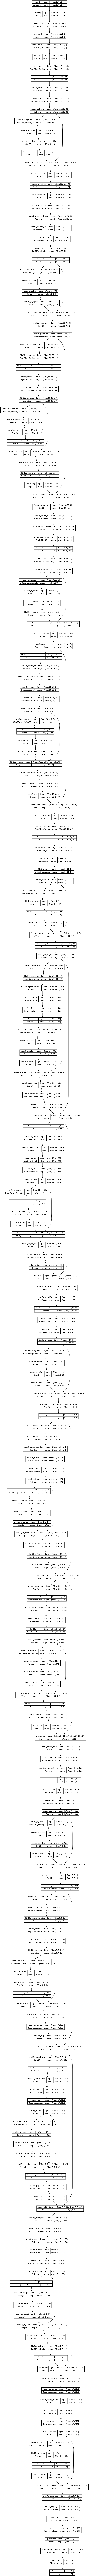

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
# Portion of data to use
train_fraction = 1
validation_fraction = 1
test_fraction = 1

# Calculate steps
train_steps = max(1, int(train_fraction * len(train_generator) / train_generator.batch_size))
validation_steps = max(1, int(validation_fraction * len(validation_generator) / validation_generator.batch_size))
test_steps = max(1, int(test_fraction * len(test_generator) / test_generator.batch_size))

# Set up the ModelCheckpoint callback
checkpoint_filepath = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',  # You can also use 'val_accuracy' or another metric
    save_best_only=True,
    save_weights_only=True,
    mode='max',  # Use 'min' if you're monitoring 'val_loss', 'max' for 'val_accuracy'
    verbose=1
)

callback = tf.keras.callbacks.EarlyStopping(patience=30)

history = model.fit(
    train_generator,
    epochs=200,
    steps_per_epoch=train_steps,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[checkpoint_callback, callback]
)

Epoch 1/200
4/6 [===================>..........] - ETA: 25s - loss: 3.0242 - accuracy: 0.0938

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


6/6 [==============================] - ETA: 0s - loss: 2.9965 - accuracy: 0.0885 
Epoch 1: val_accuracy improved from -inf to 0.06250, saving model to best_model.h5
6/6 [==============================] - 139s 22s/step - loss: 2.9965 - accuracy: 0.0885 - val_loss: 3.0081 - val_accuracy: 0.0625
Epoch 2/200
6/6 [==============================] - ETA: 0s - loss: 2.9845 - accuracy: 0.0677 
Epoch 2: val_accuracy improved from 0.06250 to 0.09375, saving model to best_model.h5
6/6 [==============================] - 132s 24s/step - loss: 2.9845 - accuracy: 0.0677 - val_loss: 3.0214 - val_accuracy: 0.0938
Epoch 3/200
6/6 [==============================] - ETA: 0s - loss: 3.1169 - accuracy: 0.0365 
Epoch 3: val_accuracy did not improve from 0.09375
6/6 [==============================] - 116s 20s/step - loss: 3.1169 - accuracy: 0.0365 - val_loss: 3.0557 - val_accuracy: 0.0156
Epoch 4/200
6/6 [==============================] - ETA: 0s - loss: 2.9678 - accuracy: 0.1042 
Epoch 4: val_accuracy did not

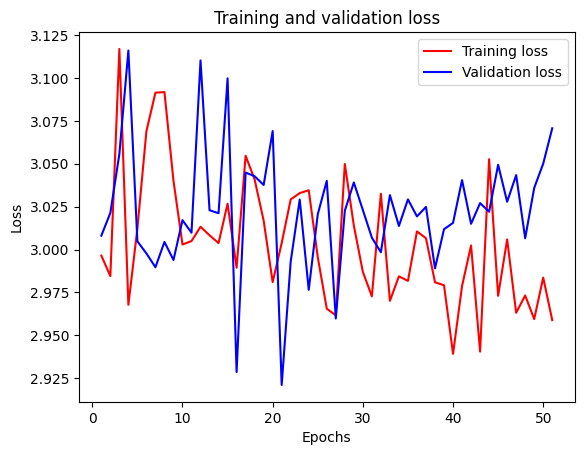

In [ ]:
import matplotlib.pyplot as plt

# Build your plot.
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

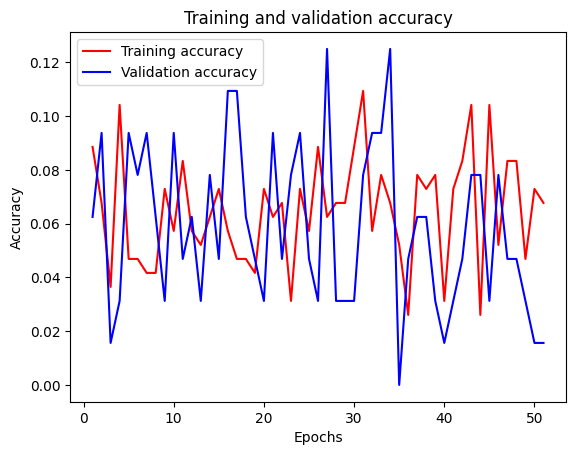

In [ ]:
history_dict = history.history
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, "r", label="Training accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Our first model: Simple Sequential Structure

In [ ]:
#Sequential model
own_model = models.Sequential()
own_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
own_model.add(layers.MaxPooling2D((2, 2)))
own_model.add(layers.Conv2D(64, (3, 3), activation='softmax'))
own_model.add(layers.MaxPooling2D((2, 2)))
own_model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
own_model.add(layers.MaxPooling2D((2, 2)))
own_model.add(layers.Conv2D(256, (3, 3), activation='softmax'))
own_model.add(layers.MaxPooling2D((2, 2)))
own_model.add(layers.Conv2D(512, (3, 3), activation='softmax'))
own_model.add(layers.MaxPooling2D((2, 2)))
own_model.add(layers.Conv2D(1024, (3, 3), activation='softmax',  padding='same'))
own_model.add(layers.MaxPooling2D((2, 2)))
own_model.add(layers.Flatten())
own_model.add(layers.Dense(128, activation='softmax'))
output = layers.Dense(20, activation='softmax', name='output')(own_model.output)

model = Model(inputs=own_model.input, outputs=output)

model.summary()

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20_input (InputLayer  [(None, 224, 224, 3)]    0         
 )                                                               
                                                                 
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                           

In [ ]:
# Portion of data to use
train_fraction = 1
validation_fraction = 1
test_fraction = 1

# Calculate steps
train_steps = max(1, int(train_fraction * len(train_generator) / train_generator.batch_size))
validation_steps = max(1, int(validation_fraction * len(validation_generator) / validation_generator.batch_size))
test_steps = max(1, int(test_fraction * len(test_generator) / test_generator.batch_size))

# Set up the ModelCheckpoint callback
checkpoint_filepath = 'best_own_model.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',  # You can also use 'val_accuracy' or another metric
    save_best_only=True,
    save_weights_only=True,
    mode='max',  # Use 'min' if you're monitoring 'val_loss', 'max' for 'val_accuracy'
    verbose=1
)

callback = tf.keras.callbacks.EarlyStopping(patience=10)

history = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=train_steps,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[checkpoint_callback, callback]
)

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 2.9957 - accuracy: 0.0260
Epoch 1: val_accuracy improved from -inf to 0.04688, saving model to best_own_model.h5
6/6 [==============================] - 57s 9s/step - loss: 2.9957 - accuracy: 0.0260 - val_loss: 2.9980 - val_accuracy: 0.0469
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 2.9958 - accuracy: 0.0521
Epoch 2: val_accuracy did not improve from 0.04688
6/6 [==============================] - 51s 9s/step - loss: 2.9958 - accuracy: 0.0521 - val_loss: 2.9953 - val_accuracy: 0.0469
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 2.9964 - accuracy: 0.0208
Epoch 3: val_accuracy improved from 0.04688 to 0.07812, saving model to best_own_model.h5
6/6 [==============================] - 53s 9s/step - loss: 2.9964 - accuracy: 0.0208 - val_loss: 2.9939 - val_accuracy: 0.0781
Epoch 4/100
6/6 [==============================] - ETA: 0s - loss: 2.9969 - accuracy: 0.0469
Epoch 4: val_accura

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


6/6 [==============================] - ETA: 0s - loss: 2.9960 - accuracy: 0.0573
Epoch 11: val_accuracy did not improve from 0.14062
6/6 [==============================] - 49s 8s/step - loss: 2.9960 - accuracy: 0.0573 - val_loss: 2.9970 - val_accuracy: 0.0312
Epoch 12/100
6/6 [==============================] - ETA: 0s - loss: 2.9939 - accuracy: 0.0677
Epoch 12: val_accuracy did not improve from 0.14062
6/6 [==============================] - 52s 9s/step - loss: 2.9939 - accuracy: 0.0677 - val_loss: 2.9940 - val_accuracy: 0.1094
Epoch 13/100
6/6 [==============================] - ETA: 0s - loss: 2.9950 - accuracy: 0.0417
Epoch 13: val_accuracy did not improve from 0.14062
6/6 [==============================] - 52s 9s/step - loss: 2.9950 - accuracy: 0.0417 - val_loss: 2.9937 - val_accuracy: 0.0781
Epoch 14/100
6/6 [==============================] - ETA: 0s - loss: 2.9906 - accuracy: 0.0729
Epoch 14: val_accuracy did not improve from 0.14062
6/6 [==============================] - 50s 9s/st

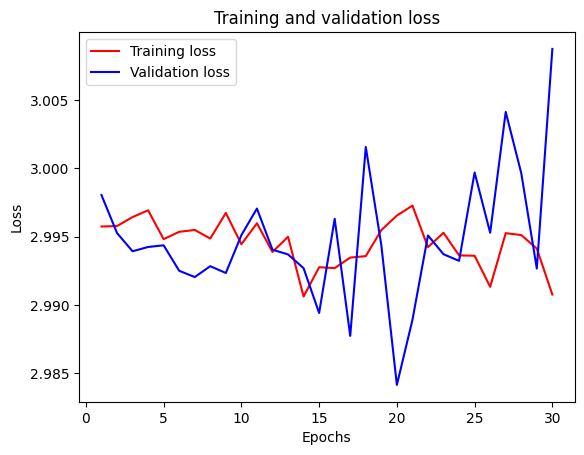

In [ ]:
import matplotlib.pyplot as plt

# Build your plot.
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

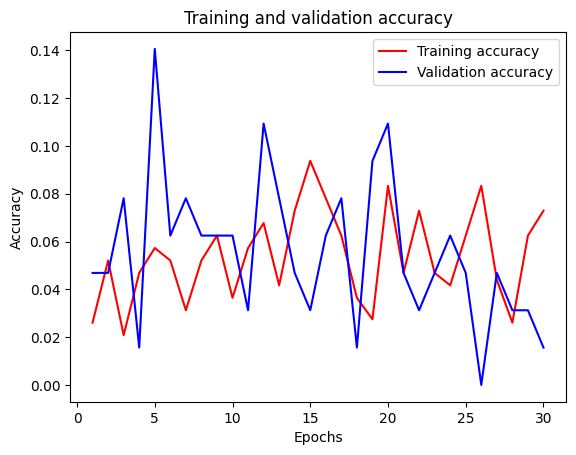

In [ ]:
history_dict = history.history
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, "r", label="Training accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Our Second Model: CNN with residual blocks

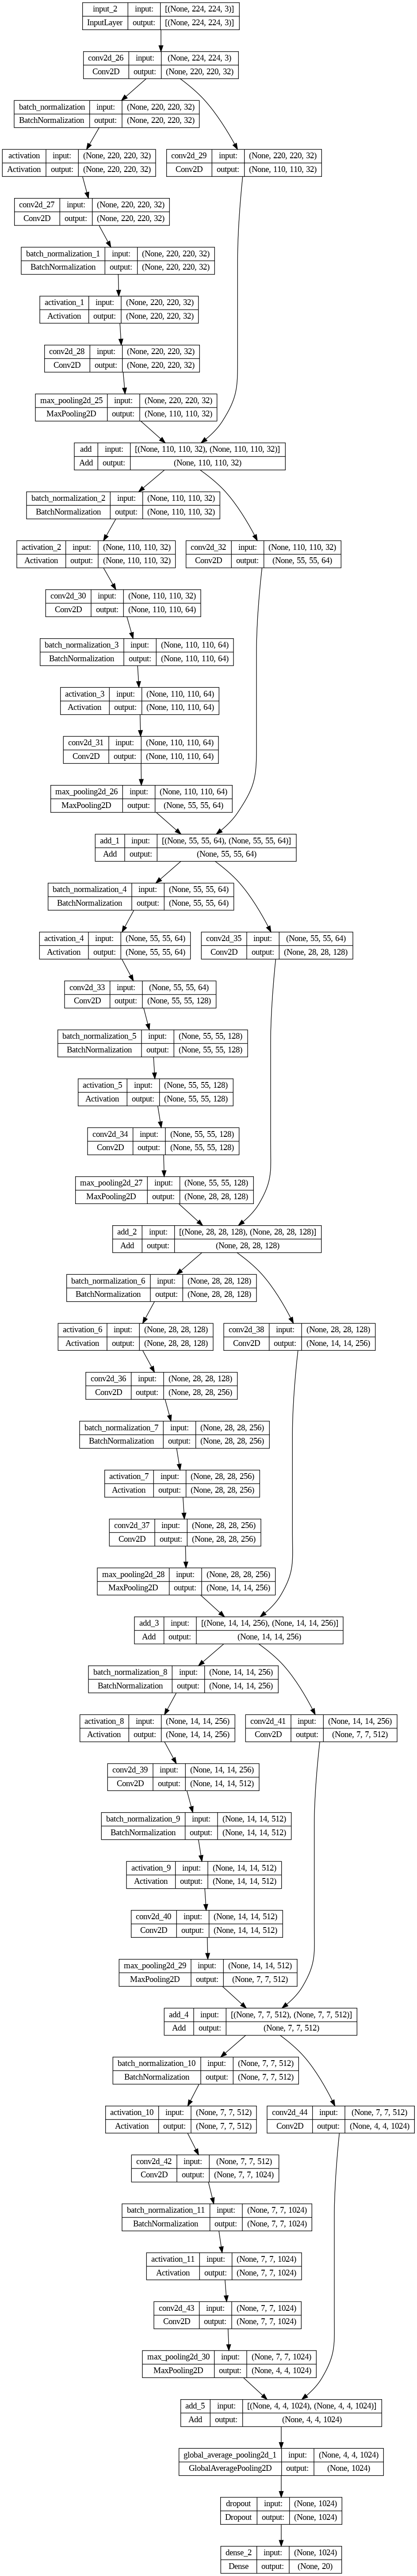

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(inputs)
 
 #add layers with the for loop
for size in [32, 64, 128, 256, 512, 1024]:
    residual = x

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(size, 3, padding="same", use_bias=False)(x)
  
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(size, 3, padding="same", use_bias=False)(x)
  
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
  
    residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])
  
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(20, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

keras.utils.plot_model(model,show_shapes=True)

In [ ]:
# Portion of data to use
train_fraction = 1
validation_fraction = 1
test_fraction = 1

# Calculate steps
train_steps = max(1, int(train_fraction * len(train_generator) / train_generator.batch_size))
validation_steps = max(1, int(validation_fraction * len(validation_generator) / validation_generator.batch_size))
test_steps = max(1, int(test_fraction * len(test_generator) / test_generator.batch_size))

# Set up the ModelCheckpoint callback
checkpoint_filepath = 'best_own_model_2.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',  # You can also use 'val_accuracy' or another metric
    save_best_only=True,
    save_weights_only=True,
    mode='max',  # Use 'min' if you're monitoring 'val_loss', 'max' for 'val_accuracy'
    verbose=1
)

callback = tf.keras.callbacks.EarlyStopping(patience=20)

history = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=train_steps,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[checkpoint_callback, callback]
)

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 32.9864 - accuracy: 0.1146 
Epoch 1: val_accuracy improved from -inf to 0.04688, saving model to best_own_model_2.h5
6/6 [==============================] - 223s 37s/step - loss: 32.9864 - accuracy: 0.1146 - val_loss: 35.9580 - val_accuracy: 0.0469
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 23.4229 - accuracy: 0.0625 
Epoch 2: val_accuracy improved from 0.04688 to 0.14062, saving model to best_own_model_2.h5
6/6 [==============================] - 213s 36s/step - loss: 23.4229 - accuracy: 0.0625 - val_loss: 8.2041 - val_accuracy: 0.1406
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 14.2959 - accuracy: 0.0729 
Epoch 3: val_accuracy did not improve from 0.14062
6/6 [==============================] - 219s 37s/step - loss: 14.2959 - accuracy: 0.0729 - val_loss: 11.3452 - val_accuracy: 0.0156
Epoch 4/100
6/6 [==============================] - ETA: 0s - loss: 10.0268 - accuracy: 0.09

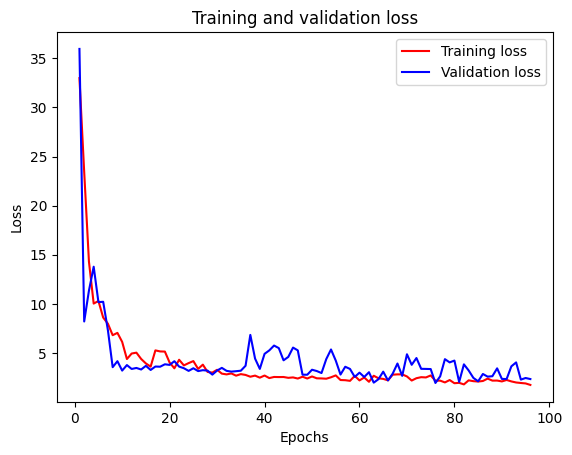

In [ ]:
import matplotlib.pyplot as plt

# Build your plot.
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

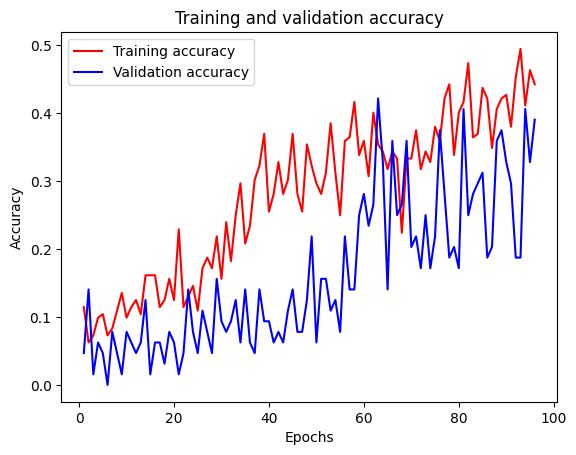

In [ ]:
history_dict = history.history
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, "r", label="Training accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Future Exploration

Although we have an 93% VGG16 model, there are more adjustment or opportunities could be made. With thess adjustments below, we believe we could bring out a better performance or a more efficient model.

- Image unification
  - We could unify our dataset better prior than any modeling process(webpage extension vs. jpg)
- Include more data for training
  - The dataset only had 7000 images across 20 labels. We could include more different kinds of fruits/vegatable.
- Add more filters for CNN
  - Regularization methods to reduce loss
  - Try different learning rate to increase performance
- Modify pre-train model
  - Add or modify layers based on more research from other papers